<a href="https://colab.research.google.com/github/Amrutha2567/ASEML/blob/main/Early_stage_diabetes_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/diabetes_data_upload (3).csv")
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


##Checking the missing values

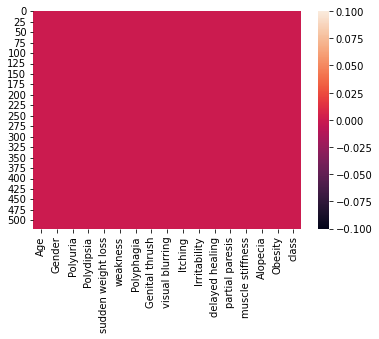

In [ ]:
  sns.heatmap(dataset.isnull())

In [ ]:
dataset['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [ ]:
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0})
dataset['class'] = dataset['class'].map({'Positive':1,'Negative':0})
dataset['Polyuria'] = dataset['Polyuria'].map({'Yes':1,'No':0})
dataset['Polydipsia'] = dataset['Polydipsia'].map({'Yes':1,'No':0})
dataset['sudden weight loss'] = dataset['sudden weight loss'].map({'Yes':1,'No':0})
dataset['weakness'] = dataset['weakness'].map({'Yes':1,'No':0})
dataset['Polyphagia'] = dataset['Polyphagia'].map({'Yes':1,'No':0})
dataset['Genital thrush'] = dataset['Genital thrush'].map({'Yes':1,'No':0})
dataset['visual blurring'] = dataset['visual blurring'].map({'Yes':1,'No':0})
dataset['Itching'] = dataset['Itching'].map({'Yes':1,'No':0})
dataset['Irritability'] = dataset['Irritability'].map({'Yes':1,'No':0})
dataset['delayed healing'] = dataset['delayed healing'].map({'Yes':1,'No':0})
dataset['partial paresis'] = dataset['partial paresis'].map({'Yes':1,'No':0})
dataset['muscle stiffness'] = dataset['muscle stiffness'].map({'Yes':1,'No':0})
dataset['Alopecia'] = dataset['Alopecia'].map({'Yes':1,'No':0})
dataset['Obesity'] = dataset['Obesity'].map({'Yes':1,'No':0})

#Exploratory Data Analysis

In [ ]:
corrdata = dataset.corr()

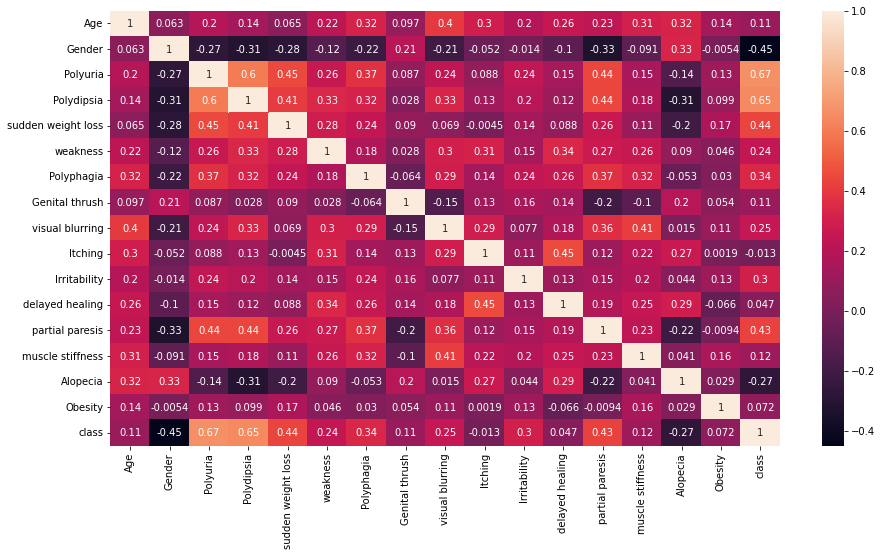

In [ ]:
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


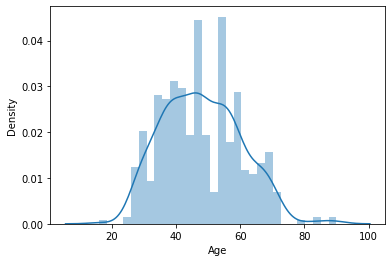

In [ ]:
sns.distplot(dataset['Age'],bins=30)

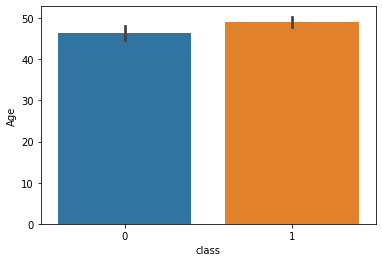

In [ ]:
sns.barplot(x='class',y='Age',data=dataset)

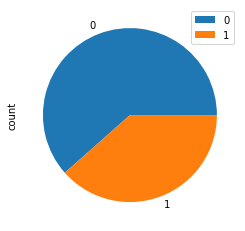

In [ ]:
ds = dataset['class'].value_counts().reset_index()
ds.columns = ['class', 'count']
plot=ds.plot.pie(y='count')

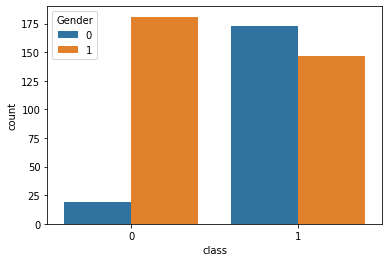

In [ ]:
sns.countplot(x='class',data=dataset,hue='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


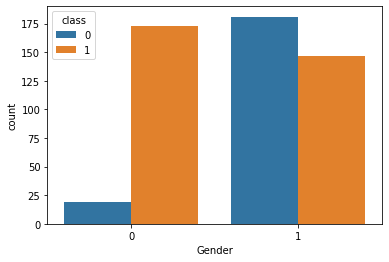

In [ ]:
sns.countplot(dataset['Gender'],hue=dataset['class'], data=dataset)

In [ ]:
plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dataset[plot_criteria[0]],dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
Gender,,
0,9.500000,54.060000
1,90.500000,45.940000


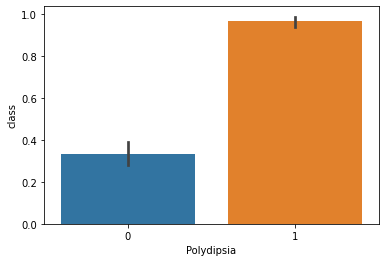

In [ ]:
sns.barplot(x='Polydipsia',y='class',data=dataset)

In [ ]:
plot_criteria= ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
Polydipsia,,
0,96.000000,29.690000
1,4.000000,70.310000


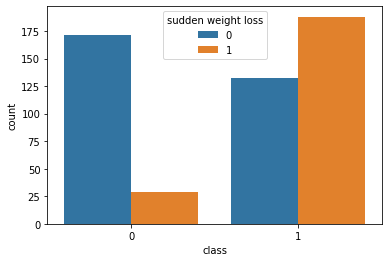

In [ ]:
sns.countplot(x='class',data=dataset,hue='sudden weight loss')

In [ ]:
plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
sudden weight loss,,
0,85.500000,41.250000
1,14.500000,58.750000


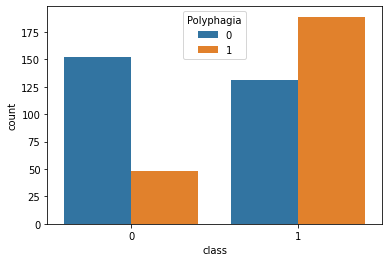

In [ ]:
sns.countplot(x='class',data=dataset, hue='Polyphagia')

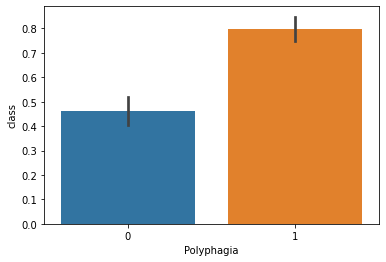

In [ ]:
sns.barplot(x='Polyphagia',y='class',data=dataset)

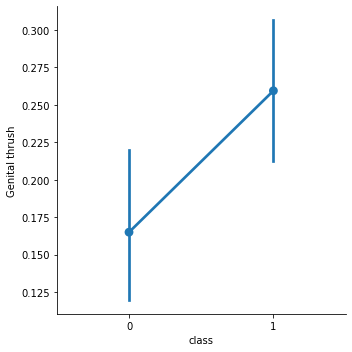

In [ ]:
sns.catplot(x='class',y='Genital thrush',kind='point',data=dataset)

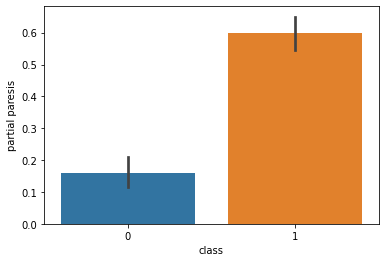

In [ ]:
sns.barplot(x='class',y='partial paresis',data=dataset)

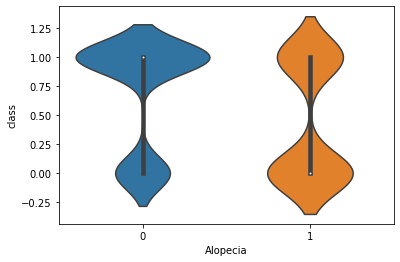

In [ ]:
sns.violinplot(x='Alopecia',y='class',data=dataset)

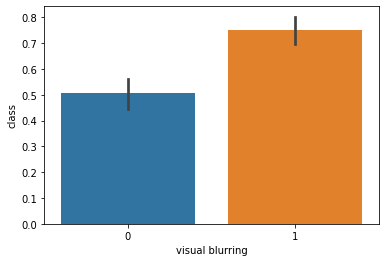

In [ ]:
sns.barplot(x="visual blurring", y="class", data=dataset)

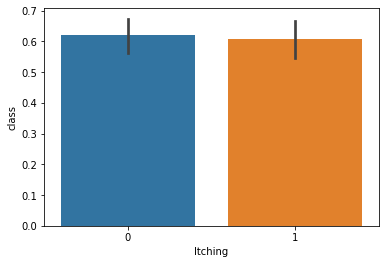

In [ ]:
sns.barplot(x="Itching", y="class", data=dataset)

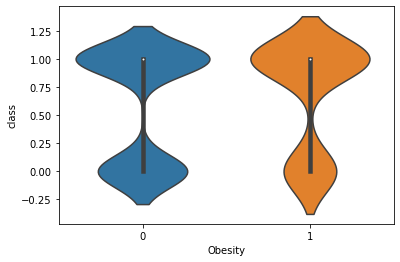

In [ ]:
sns.violinplot(x='Obesity',y='class',data=dataset)

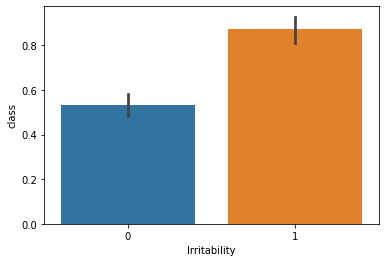

In [ ]:
sns.barplot(x='Irritability',y='class',data=dataset)

In [ ]:
X1 = dataset.iloc[:,0:-1]
y1 = dataset.iloc[:,-1]

In [ ]:
X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [ ]:
X1.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894


###Feature selection using selectkbest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

These are the variables with their feature scores ,their importance/contribution towards class

In [ ]:
featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


In [ ]:
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


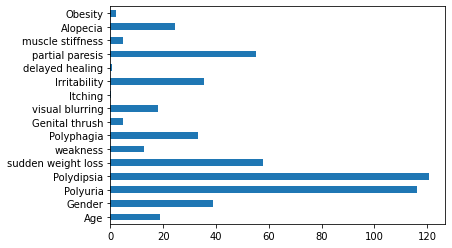

In [ ]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot(kind='barh')

In [ ]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

In [ ]:
dataset_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X1.columns)

In [ ]:
high_variance = pd.concat([dataset_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']

In [ ]:
high_variance[high_variance['variance']>0.2]

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
8,0.247304,visual blurring
9,0.249819,Itching
11,0.248369,delayed healing


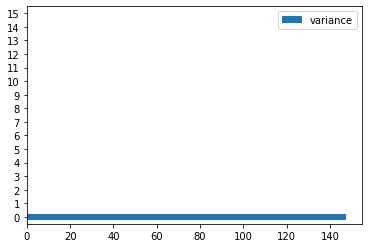

In [ ]:
X = dataset[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = dataset['class']
high_variance.plot(kind='barh')


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Logistics Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 84.85 %
std is 4.95 %


In [ ]:
pre=lg.predict(X_test)

In [ ]:
logistic_regression=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))

0.8942307692307693
[[34  5]
 [ 6 59]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.91      0.91        65

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



# SVM


In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 83.18 %
std is 4.94 %


In [ ]:
pre1=sv.predict(X_test)

In [ ]:
svm_linear=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))

0.9038461538461539
[[34  4]
 [ 6 60]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.94      0.91      0.92        66

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



In [ ]:
from sklearn.svm import SVC
svrf=SVC(kernel='rbf',random_state=0)
svrf.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svrf, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 88.47 %
std is 3.69 %


In [ ]:
pre2=svrf.predict(X_test)

In [ ]:
svm_rbf=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



#Navie Bayes- Gaussiann NB


In [ ]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 82.94 %
std is 8.03 %


In [ ]:
pre4=gb.predict(X_test)

In [ ]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))
print(confusion_matrix(pre4,y_test))

0.8557692307692307
[[32  7]
 [ 8 57]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre4,y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.89      0.88      0.88        65

    accuracy                           0.86       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.86      0.86      0.86       104



#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 91.11 %
std is 4.02 %


In [ ]:
pre5=dc.predict(X_test)

In [ ]:
Decisiontress_classifier=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))

0.9615384615384616
[[38  2]
 [ 2 62]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 89.90 %
std is 5.60 %


In [ ]:
pre6 = rc.predict(X_test)

In [ ]:
Random_forest=accuracy_score(pre6,y_test)
print(accuracy_score(pre6,y_test))
print(confusion_matrix(pre6,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pre6,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



#Accuracies of all clasifications model overview


In [ ]:
print('Logistic regression:',logistic_regression)
print('svmlinear:',svm_linear)
print('svmrbf:',svm_rbf)
print('naive bayes:',Naive_bayes_Gaussian_nb)
print('Decision tress:',Decisiontress_classifier)
print('Random forest:',Random_forest)

Logistic regression: 0.8942307692307693
svmlinear: 0.9038461538461539
svmrbf: 0.9807692307692307
naive bayes: 0.8557692307692307
Decision tress: 0.9615384615384616
Random forest: 0.9807692307692307
